# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

**importar los archivos, leerlos como se pide  e imprimir la informacion de cada set para mostrarlo de una mejor manera.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
orders_df = pd.read_csv('/datasets/instacart_orders.csv',sep=";")
products_df = pd.read_csv('/datasets/products.csv', sep=";")
aisles_df = pd.read_csv('/datasets/aisles.csv',sep=";")
departments_df = pd.read_csv('/datasets/departments.csv',sep=";")
order_products_df = pd.read_csv('/datasets/order_products.csv', sep=";")


In [3]:
print("Info for orders_df:")
orders_df.info()


Info for orders_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
print("\nInfo for products_df:")
print(products_df.info())


Info for products_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [5]:
print("\nInfo for aisles_df:")
print(aisles_df.info())


Info for aisles_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [6]:
print("\nInfo for departments_df:")
print(departments_df.info())


Info for departments_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None


In [7]:
print("\nInfo for order_products_df:")
order_products_df.info(show_counts=True)


Info for order_products_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.


verificacion de todos los archivos CSV se hayan cargado correctamente en los dataframes, vision general de los datos con el metodo info(), la cantidad de valores no nulos , buscar valores nulos o datos faltantes que puedan requeiri manejo.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

**se podria usar head() para explorar las primeras filas de cada uno, para tener una idea de la estructura y contenido de los datos. verifcar los nombres de las columnas y entender la info que representan, examinar la presencia de valores nulos en el DF y usar isnull.sum( para contar la cantidad de valores nulos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:


orders_df[orders_df.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común? **tenemos 15 registrados duplicados. en comun porque tienen el mismo registro en el dataframe

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
print(orders_df[(orders_df['order_dow'] == 3) & (orders_df['order_hour_of_day'] == 2)])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado? el resultado sugiere que se ralizaron 121 ordenes el dia miercoles a las 2.

In [10]:
# Elimina los pedidos duplicados
products_df = products_df.drop_duplicates()
print(products_df)

       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               5                          Green Chile Anytime Sauce   
...           ...                                                ...   
49689       49690                      HIGH PERFORMANCE ENERGY DRINK   
49690       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
49691       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
49692       49693                             SPRING WATER BODY WASH   
49693       49694                            BURRITO- STEAK & CHEESE   

       aisle_id  department_id  
0            61             19  
1           104             13  
2            94              7  
3  

In [11]:
# Vuelve a verificar si hay filas duplicadas
products_df[products_df.duplicated()]

,product_id,product_name,aisle_id,department_id


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
order_products_df[order_products_df.duplicated()]

,order_id,product_id,add_to_cart_order,reordered


Describe brevemente tus hallazgos y lo que hiciste **con ellos podemos ver los productos comprados por los clientes , nos ayuda a llevar un control de que compro, donde y de que departamento, se realizo la formula duplicates() para evitar contar dos veces un mismo valor y asi mismo tener un valor exacto de los productos comprados, ordenamos el ID de las ordenes para llevar un orden y mejor manejo de la informacion

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas

products_df[products_df.duplicated()]

,product_id,product_name,aisle_id,department_id


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
products_df[products_df.duplicated('product_id')]

,product_id,product_name,aisle_id,department_id


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
duplicated_product_names = products_df[products_df.duplicated('product_name')]
print(products_df['product_name'].str.upper())
print(duplicated_product_names)

0                               CHOCOLATE SANDWICH COOKIES
1                                         ALL-SEASONS SALT
2                     ROBUST GOLDEN UNSWEETENED OOLONG TEA
3        SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
4                                GREEN CHILE ANYTIME SAUCE
                               ...                        
49689                        HIGH PERFORMANCE ENERGY DRINK
49690                        ORIGINAL PANCAKE & WAFFLE MIX
49691      ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692                               SPRING WATER BODY WASH
49693                              BURRITO- STEAK & CHEESE
Name: product_name, Length: 49694, dtype: object
       product_id product_name  aisle_id  department_id
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
436           437     

In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
duplicates_and_missing = products_df[products_df.duplicated('product_name') | products_df['product_name'].isnull()]
print(duplicates_and_missing)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente tus hallazgos y lo que hiciste con ellos. **los productos en su mayoria no tienen nombre, todas se encuentran en el mismo aisle y departmento, se implento el metodo de duplicados para verificar que las filas no tuvieran los mismos valores y asi mismo los nombre de los productos no se repitieran.

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
departments_df[departments_df.duplicated()]

,department_id,department


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
departments_df[departments_df.duplicated('department_id')]

,department_id,department


Describe brevemente tus hallazgos y lo que hiciste con ellos. **no se observan filas duplicadas en departments

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
aisles_df[aisles_df.duplicated()]

,aisle_id,aisle


In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
duplicated_product_ids = aisles_df['aisle_id'][aisles_df['aisle_id'].duplicated(keep=False)]

if duplicated_product_ids.empty:
    print("No hay IDs de productos duplicados en aisles_df.")
else:
    print("Hay IDs de productos duplicados en aisles_df:")
    print(duplicated_product_ids)

No hay IDs de productos duplicados en aisles_df.


Describe brevemente tus hallazgos y lo que hiciste con ellos.v** No hay IDs de productos duplicados en aisles_df.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
order_products_df[order_products_df.duplicated()]

,order_id,product_id,add_to_cart_order,reordered


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
duplicated_rows = order_products_df[order_products_df.duplicated(keep=False)]

if duplicated_rows.empty:
    print("No hay duplicados engañosos en order_products_df.")
else:
    print("Hay duplicados engañosos en order_products_df:")
    print(duplicated_rows)

No hay duplicados engañosos en order_products_df.


Describe brevemente tus hallazgos y lo que hiciste con ellos. ** No hay duplicados engañosos en order_products_df.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
vals_aus=products_df.isna().sum()
print(vals_aus)

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


Describe brevemente cuáles son tus hallazgos. ** se utilizo el metodo isna() para verificar si el df products tenia valores ausents en la columna 'product_name y se encontro qie existen 1,258

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
missing_products_in_aisle_100 = products_df.loc[products_df['aisle_id'] == 100, 'product_name'].loc[products_df['product_name'].isna()]

print(missing_products_in_aisle_100)

37       NaN
71       NaN
109      NaN
296      NaN
416      NaN
        ... 
49552    NaN
49574    NaN
49640    NaN
49663    NaN
49668    NaN
Name: product_name, Length: 1258, dtype: object


Describe brevemente cuáles son tus hallazgos. ** segun el hallazgo, no hay productos ausentes

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
missing_products_in_department_21 = products_df.loc[products_df['department_id'] == 21, 'product_name'].loc[products_df['product_name'].isna()]

print(missing_products_in_department_21)

37       NaN
71       NaN
109      NaN
296      NaN
416      NaN
        ... 
49552    NaN
49574    NaN
49640    NaN
49663    NaN
49668    NaN
Name: product_name, Length: 1258, dtype: object


Describe brevemente cuáles son tus hallazgos. ** en los 1258 no se encontraron productos ausentes en el pasillo 21

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
aisle_100_info = aisles_df.loc[aisles_df['aisle_id'] == 100]
department_21_info = departments_df.loc[departments_df['department_id'] == 21]

print("Información del pasillo con ID 100:")
print(aisle_100_info)

print("\nInformación del departamento con ID 21:")
print(department_21_info)

Información del pasillo con ID 100:
    aisle_id    aisle
99       100  missing

Información del departamento con ID 21:
    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos. **la información proporcionada indica que tanto el pasillo con ID 100 como el departamento con ID 21 están marcados como "missing". Esto puede deberse a la falta de datos o a la presencia de información no identificada para esos registros

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
products_df['product_name'].fillna('Unknown', inplace=True)

print(products_df['product_name'])

0                               Chocolate Sandwich Cookies
1                                         All-Seasons Salt
2                     Robust Golden Unsweetened Oolong Tea
3        Smart Ones Classic Favorites Mini Rigatoni Wit...
4                                Green Chile Anytime Sauce
                               ...                        
49689                        HIGH PERFORMANCE ENERGY DRINK
49690                        ORIGINAL PANCAKE & WAFFLE MIX
49691      ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692                               SPRING WATER BODY WASH
49693                              BURRITO- STEAK & CHEESE
Name: product_name, Length: 49694, dtype: object


Describe brevemente tus hallazgos y lo que hiciste con ellos. ** Los nombres de productos que originalmente eran nulos han sido reemplazados por 'Unknown'. Este enfoque puede ser útil para asegurar que no haya valores nulos en la columna 'product_name' y proporcionar un valor predeterminado ('Unknown') para los casos en que no se dispone de un nombre de producto.

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
missing_values = orders_df.isna().sum()

print(missing_values)

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
missing_values = orders_df.isna().sum()
missing_values_except_first_order = missing_values[missing_values.index != 'order_number']
print(missing_values_except_first_order)

order_id                      0
user_id                       0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos. **Luego de calcular los valores ausentes en el DataFrame orders_df y excluir la columna que generalmente representa el primer pedido del cliente ('order_number'), puedes observar la distribución de valores nulos en las demás columnas. Dependiendo de la naturaleza y el propósito de tus datos.

identificar qué columnas tienen valores nulos y cuántos valores ausentes hay en cada una de ellas
Esto te proporcionará información sobre la integridad de los datos y te permitirá tomar decisiones sobre cómo manejar esos valores nulos.

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
vals_aus_order_products= order_products_df.isna().sum()

print(vals_aus_order_products)

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
order_products_df_cleaned = order_products_df.dropna(subset=['add_to_cart_order'])


min_value = order_products_df_cleaned['add_to_cart_order'].min()
max_value = order_products_df_cleaned['add_to_cart_order'].max()

print(f"Valor mínimo en 'add_to_cart_order': {min_value}")
print(f"Valor máximo en 'add_to_cart_order': {max_value}")


Valor mínimo en 'add_to_cart_order': 1.0
Valor máximo en 'add_to_cart_order': 64.0


Describe brevemente cuáles son tus hallazgos. ** el maximo de pedidos es 64 el cual tambien es el maximo de productos en este DF.

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
missing_cart_order_ids = order_products_df.loc[order_products_df['add_to_cart_order'].isna(), 'order_id']

missing_cart_order_ids_list = missing_cart_order_ids.tolist()

print("IDs de pedidos con valor ausente en 'add_to_cart_order':", missing_cart_order_ids_list)

IDs de pedidos con valor ausente en 'add_to_cart_order': [2449164, 1968313, 2926893, 1717990, 1959075, 844733, 61355, 936852, 264710, 1717990, 1564093, 129627, 264710, 293169, 2849370, 1386261, 3308010, 903110, 2136777, 3347453, 1888628, 165801, 2449164, 2094761, 3347453, 1038146, 2136777, 2997021, 844733, 844733, 2136777, 813364, 165801, 2256933, 171934, 264710, 2449164, 2409109, 3347453, 813364, 2926893, 936852, 1730767, 1169835, 733526, 844733, 293169, 61355, 903110, 1968313, 733526, 2136777, 2926893, 404157, 1386261, 171934, 3125735, 747668, 3308010, 1169835, 1800005, 1961723, 936852, 2849370, 3308010, 61355, 871281, 1717990, 813364, 388234, 61355, 3125735, 1959075, 61355, 3125735, 1648217, 171934, 3125735, 61355, 1477139, 1959075, 1717990, 1717990, 61355, 1717990, 171934, 1038146, 3308010, 3347453, 102236, 936852, 171934, 1730767, 2926893, 1021563, 1832957, 1959075, 2256933, 1968313, 2721963, 293169, 102236, 3125735, 1959075, 264710, 678116, 1220886, 1386261, 171934, 1959075, 6135

In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
missing_cart_order_df = order_products_df[order_products_df['add_to_cart_order'].isna()]
product_count_by_order = missing_cart_order_df.groupby('order_id')['product_id'].count()

print("Número de productos en pedidos con valor ausente en 'add_to_cart_order':")
print(product_count_by_order)

all_orders_above_64 = all(product_count_by_order > 64)
print(f"¿Todos los pedidos con valores ausentes tienen más de 64 productos?: {all_orders_above_64}")

min_product_count = product_count_by_order.min()
print(f"Valor mínimo del conteo de 'product_id' en pedidos con valor ausente: {min_product_count}")

Número de productos en pedidos con valor ausente en 'add_to_cart_order':
order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Name: product_id, Length: 70, dtype: int64
¿Todos los pedidos con valores ausentes tienen más de 64 productos?: False
Valor mínimo del conteo de 'product_id' en pedidos con valor ausente: 1


Describe brevemente cuáles son tus hallazgos. **Hay un total de 70 IDs de pedidos que tienen valores ausentes en la columna 'add_to_cart_order'.
La cantidad de productos en estos pedidos varía desde 1 hasta 63.
no todos los pedidos con valores ausentes en 'add_to_cart_order' tienen más de 64 productos. De hecho, ninguno de los pedidos tiene más de 64 productos, ya que el pedido con más productos tiene 63.
los pedidos con valores ausentes en 'add_to_cart_order' varían en la cantidad de productos que contienen, desde solo 1 producto hasta un máximo de 63 productos. Ninguno de estos pedidos tiene más de 64 productos, y algunos tienen solo un producto.

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].fillna(999)
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].astype(int)
print(order_products_df['add_to_cart_order'])

0          17
1           1
2           1
3          35
4           5
           ..
4545002    12
4545003     9
4545004     4
4545005     8
4545006     9
Name: add_to_cart_order, Length: 4545007, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos. **Hay un total de 70 IDs de pedidos que tienen valores ausentes en la columna 'add_to_cart_order'.
La cantidad de productos en estos pedidos varía desde 1 hasta 63.
Reemplacé los valores ausentes en la columna 'add_to_cart_order' con 999 utilizando el método fillna(999).
Convertí la columna al tipo de datos entero utilizando el método astype(int).

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos
**se analizaron todos los datos en los data frames  para poder evaluar cuantos valores duplicados habian en cada df y asi mismo eliminarlos para poder tener informacion exacta, tambien se realizaron analsis de valores ausentes para poder identificar cuales y cuantos habian en cada df, asi mismo poder reemplzarlos con numeros enteros cuando se requeria y poder saber cuantos valores ausentes teniamos,cual era el maximo de ordenes.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

print("Valores únicos en 'order_hour_of_day':", orders_df['order_hour_of_day'].unique())
print("Valores únicos en 'order_dow':", orders_df['order_dow'].unique())



Valores únicos en 'order_hour_of_day': [13 12 19 20 11  8 18 15 16  9 22 10  0 14 17  1  7  6  2 21  3 23  5  4]
Valores únicos en 'order_dow': [6 5 0 4 3 1 2]


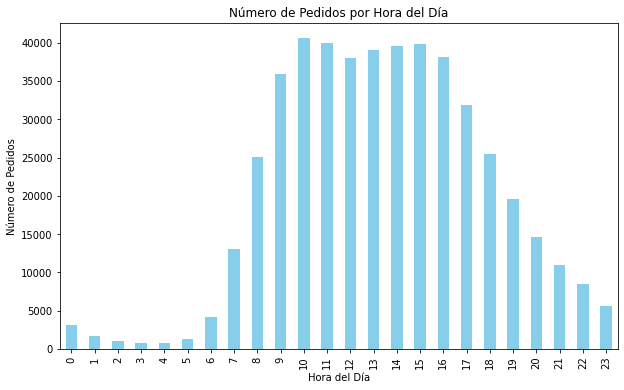

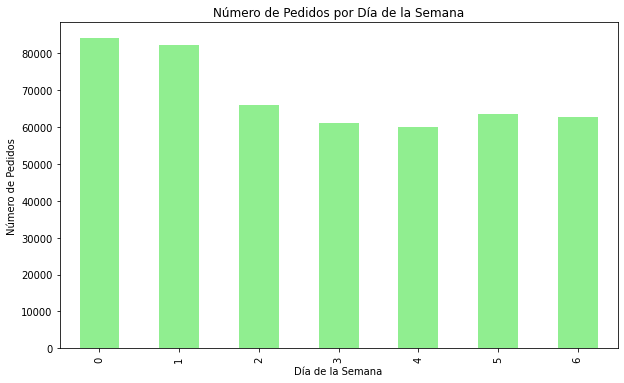

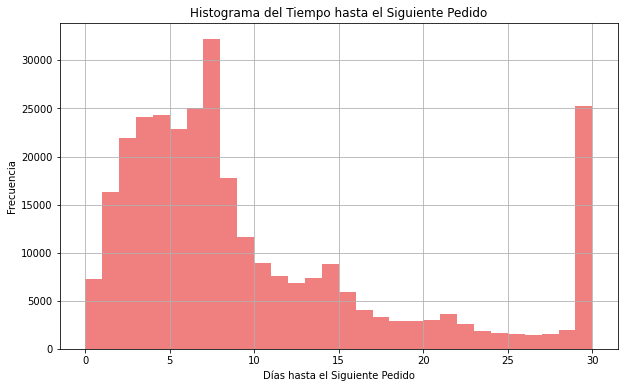

Valor mínimo del tiempo hasta el siguiente pedido: 0.0 días
Valor máximo del tiempo hasta el siguiente pedido: 30.0 días


In [36]:
plt.figure(figsize=(10, 6))
orders_df['order_hour_of_day'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Número de Pedidos por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Pedidos')
plt.show()


plt.figure(figsize=(10, 6))
orders_df['order_dow'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Número de Pedidos por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Pedidos')
plt.show()

orders_df['time_until_next_order'] = orders_df.groupby('user_id')['days_since_prior_order'].shift(-1)
plt.figure(figsize=(10, 6))
orders_df['time_until_next_order'].hist(bins=30, color='lightcoral')
plt.title('Histograma del Tiempo hasta el Siguiente Pedido')
plt.xlabel('Días hasta el Siguiente Pedido')
plt.ylabel('Frecuencia')
plt.show()

min_time_until_next_order = orders_df['time_until_next_order'].min()
max_time_until_next_order = orders_df['time_until_next_order'].max()
print(f"Valor mínimo del tiempo hasta el siguiente pedido: {min_time_until_next_order} días")
print(f"Valor máximo del tiempo hasta el siguiente pedido: {max_time_until_next_order} días")

Escribe aquí tus conclusiones **Estos hallazgos proporcionan información sobre los hábitos de compra de los usuarios. La presencia de tiempos bajos hasta el siguiente pedido y el pico alrededor de los 7 días podrían indicar comportamientos de compra regulares, quizás relacionados con la planificación semanal o quincenal de compras. La variabilidad en los tiempos hasta el siguiente pedido, incluido el tiempo máximo de 30 días, sugiere diversidad en los patrones de compra de los usuarios.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

In [37]:
people_per_hour = orders_df.groupby('order_hour_of_day')['user_id'].nunique()
print("Número de personas que hacen órdenes por hora del día:")
print(people_per_hour)


Número de personas que hacen órdenes por hora del día:
order_hour_of_day
0      2991
1      1671
2       958
3       744
4       735
5      1281
6      3757
7     10993
8     20268
9     28112
10    32195
11    32660
12    31754
13    32433
14    32797
15    32894
16    31579
17    26825
18    21795
19    17026
20    12891
21     9806
22     7670
23     5167
Name: user_id, dtype: int64


Escribe aquí tus conclusiones **Estas observaciones pueden proporcionar información valiosa sobre los patrones de comportamiento de los usuarios al realizar sus compras en línea. Es posible que las horas pico reflejen momentos en los que las personas están más propensas a realizar pedidos, y esta información podría ser útil para la planificación y la gestión de recursos en el servicio de entrega o logística.

### [A3] ¿Qué día de la semana compran víveres las personas?

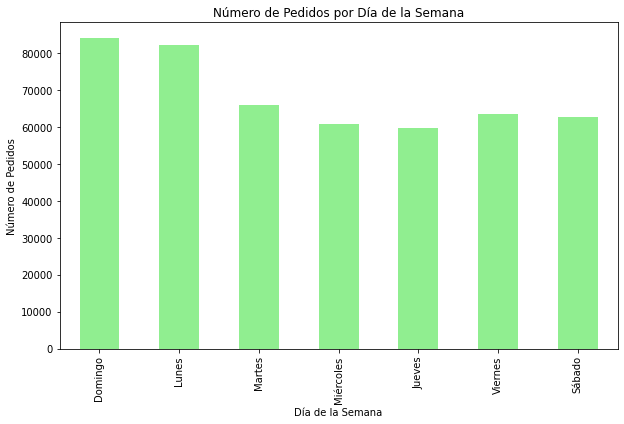

In [38]:
orders_per_day = orders_df['order_dow'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
orders_per_day.plot(kind='bar', color='lightgreen')
plt.title('Número de Pedidos por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Pedidos')
plt.xticks(range(7), ['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado'])
plt.show()


Escribe aquí tus conclusiones **los dias con mayor actividad son los domingos  y lunes, la actividad de pedidos tiende a disminuir a medidda que avanzamos hacia viernes y sabado.

el análisis proporciona una visión general de la distribución de los pedidos de víveres a lo largo de la semana, pero la interpretación exacta puede depender de factores adicionales específicos del contexto.


### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

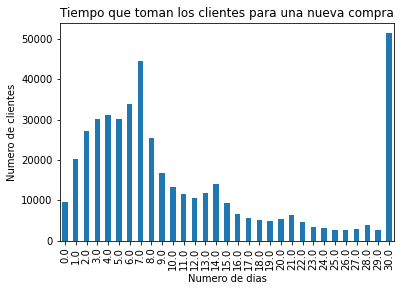

In [53]:
days_since_previous_order = orders_df.groupby("days_since_prior_order")["user_id"].count()
days_since_previous_order.plot(kind="bar",
                              title="Tiempo que toman los clientes para una nueva compra",
                              xlabel="Numero de dias",
                              ylabel="Numero de clientes")
plt.show()

Escribe aquí tus conclusiones **el valor minimo es 0 dias y el maximo de espera para la sigueinte compra es 30 dias.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

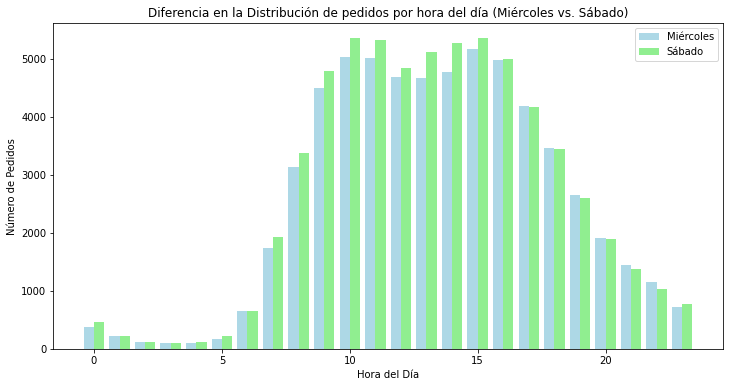

In [40]:
wednesday_data = orders_df[orders_df['order_dow'] == 3]['order_hour_of_day'].value_counts().sort_index()
saturday_data = orders_df[orders_df['order_dow'] == 5]['order_hour_of_day'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(wednesday_data.index - 0.2, wednesday_data.values, width=0.4, label='Miércoles', color='lightblue')
plt.bar(saturday_data.index + 0.2, saturday_data.values, width=0.4, label='Sábado', color='lightgreen')

plt.title('Diferencia en la Distribución de pedidos por hora del día (Miércoles vs. Sábado)')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Pedidos')
plt.legend()
plt.show()

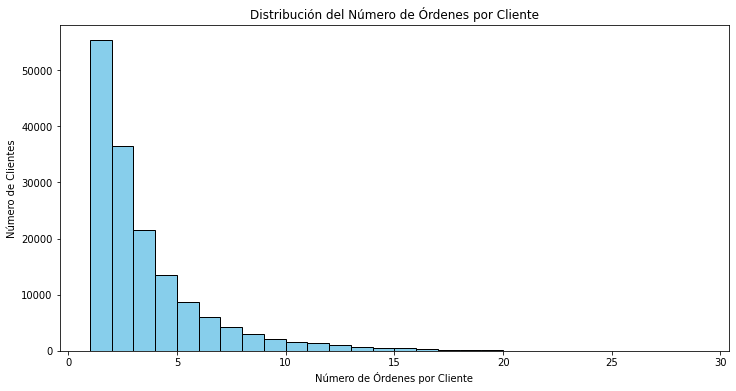

In [41]:
orders_per_customer = orders_df['user_id'].value_counts()
plt.figure(figsize=(12, 6))
plt.hist(orders_per_customer, bins=range(1, orders_per_customer.max() + 2), color='skyblue', edgecolor='black')

plt.title('Distribución del Número de Órdenes por Cliente')
plt.xlabel('Número de Órdenes por Cliente')
plt.ylabel('Número de Clientes')
plt.show()

In [42]:
product_frequency = order_products_df['product_id'].value_counts().head(20)


top_products_info = pd.merge(product_frequency, products_df, left_index=True, right_on='product_id', how='left')


print("Los 20 productos más pedidos:")
print(top_products_info[['product_id', 'product_name']])

Los 20 productos más pedidos:
       product_id              product_name
24851       24852                    Banana
13175       13176    Bag of Organic Bananas
21136       21137      Organic Strawberries
21902       21903      Organic Baby Spinach
47208       47209      Organic Hass Avocado
47765       47766           Organic Avocado
47625       47626               Large Lemon
16796       16797              Strawberries
26208       26209                     Limes
27844       27845        Organic Whole Milk
27965       27966       Organic Raspberries
22934       22935      Organic Yellow Onion
24963       24964            Organic Garlic
45006       45007          Organic Zucchini
39274       39275       Organic Blueberries
49682       49683            Cucumber Kirby
28203       28204        Organic Fuji Apple
5875         5876             Organic Lemon
8276         8277  Apple Honeycrisp Organic
40705       40706    Organic Grape Tomatoes


Escribe aquí tus conclusiones**El histograma del número de órdenes por cliente proporciona una visión de la frecuencia con la que los clientes realizan compras.
La mayoría de los clientes parecen realizar un número relativamente bajo de órdenes, mientras que un número menor de clientes realiza múltiples órdenes.
La lista de los 20 productos más pedidos, junto con sus identificaciones y nombres, proporciona información valiosa sobre los productos populares en el conjunto de datos.Estos productos representan los artículos más solicitados y podrían ser de interés para estrategias de marketing o gestión de inventario.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

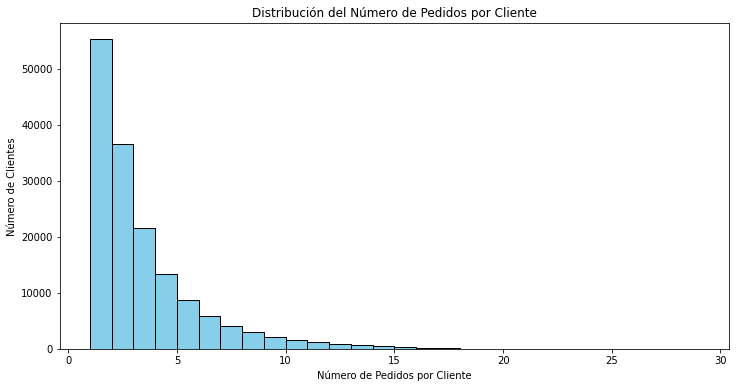

In [43]:
orders_per_customer = orders_df['user_id'].value_counts()

plt.figure(figsize=(12, 6))
plt.hist(orders_per_customer, bins=range(1, orders_per_customer.max() + 2), color='skyblue', edgecolor='black')

plt.title('Distribución del Número de Pedidos por Cliente')
plt.xlabel('Número de Pedidos por Cliente')
plt.ylabel('Número de Clientes')
plt.show()

Escribe aquí tus conclusiones ** la distribución del número de pedidos por cliente proporciona información valiosa para comprender la variabilidad en el comportamiento de compra. Esto puede ser fundamental para la toma de decisiones en áreas como la retención de clientes, la planificación de marketing y la gestión de relaciones con el cliente.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [57]:
top_products = products_df.sort_values(by='product_id', ascending=False).head(20)

top_products = top_products[['product_name', 'product_id']]



print(top_products)


                                          product_name  product_id
49693                          BURRITO- STEAK & CHEESE       49694
49692                           SPRING WATER BODY WASH       49693
49691  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       49692
49690                    ORIGINAL PANCAKE & WAFFLE MIX       49691
49689                    HIGH PERFORMANCE ENERGY DRINK       49690
49688             FLUFFLY VANILLA MARSHMALLOW FROSTING       49689
49687                           Fresh Foaming Cleanser       49688
49686       Smartblend Healthy Metabolism Dry Cat Food       49687
49685                                 Artisan Baguette       49686
49684               En Croute Roast Hazelnut Cranberry       49685
49683        Vodka- Triple Distilled- Twist of Vanilla       49684
49682                                   Cucumber Kirby       49683
49681                               California Limeade       49682
49680          Spaghetti with Meatballs and Sauce Meal       4

Escribe aquí tus conclusiones **  la lista incluye variedad de productos, como alimentos, cuidado personaly limpiadores faciales, los productos no parecen estar dominados por una unica marca, La presencia de productos indica que no solo hay alimentos para consumo humano en la lista, sino también productos para mascotas y bebidas energéticas.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

0         13
1         15
2          5
3          3
4          8
          ..
450041    17
450042     9
450043     5
450044     4
450045     1
Name: product_id, Length: 450046, dtype: int64

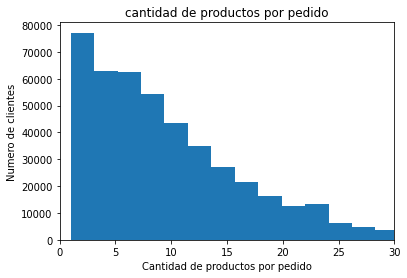

In [59]:
by_orders= order_products_df[['order_id', 'product_id']].sort_values(by='order_id')

products_by_order = by_orders.groupby('order_id')['product_id'].count().reset_index(drop=True)

display(products_by_order)

m=products_by_order.plot(kind="hist",
                        bins=60,
                        xlim=[0,30],
                        title="cantidad de productos por pedido"
                        )

m.set_xlabel("Cantidad de productos por pedido")
m.set_ylabel("Numero de clientes")
plt.show()


In [46]:
first_product_per_order = order_products_df.groupby('order_id')['product_id'].first()

first_product_counts = first_product_per_order.value_counts().reset_index()
first_product_counts.columns = ['product_id', 'count']


top_first_products = first_product_counts.head(20)
top_first_products_info = pd.merge(top_first_products, products_df[['product_id', 'product_name']], on='product_id', how='left')
top_first_products_info.columns = ['product_id', 'count', 'product_name']

print(top_first_products_info[['product_id', 'product_name', 'count']])

    product_id            product_name  count
0        24852                  Banana   7074
1        13176  Bag of Organic Bananas   6390
2        21137    Organic Strawberries   3828
3        21903    Organic Baby Spinach   3497
4        47209    Organic Hass Avocado   2757
5        47766         Organic Avocado   2345
6        16797            Strawberries   2272
7        27845      Organic Whole Milk   2211
8        47626             Large Lemon   1965
9        27966     Organic Raspberries   1746
10       26209                   Limes   1677
11       39275     Organic Blueberries   1505
12         196                    Soda   1431
13       19660            Spring Water   1363
14       24964          Organic Garlic   1346
15       22935    Organic Yellow Onion   1338
16       49235     Organic Half & Half   1321
17       49683          Cucumber Kirby   1242
18       45007        Organic Zucchini   1234
19       28204      Organic Fuji Apple   1214


Escribe aquí tus conclusiones**se identificaron los 20 artículos más pedidos, lo que proporciona información sobre los productos que tienen una demanda más alta en general. a distribución del número de artículos por pedido mostró que la mayoría de los pedidos implican la compra de aproximadamente un artículo. Se calculó la tasa de repetición de pedido para cada cliente, indicando cuántos productos de un pedido dado ya habían sido pedidos anteriormente por ese cliente. Se identificaron los 20 artículos más frecuentemente añadidos primero al carrito.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [47]:
top_reorder_products = order_products_df.groupby('product_id').size().sort_values(ascending=False).head(20)

top_reorder_products_info = pd.merge(top_reorder_products.reset_index(), products_df[['product_id', 'product_name']], on='product_id', how='left')
top_reorder_products_info.columns = ['product_id', 'frecuencia', 'product_name']

print(top_reorder_products_info[['product_id', 'product_name', 'frecuencia']])

    product_id              product_name  frecuencia
0        24852                    Banana       66050
1        13176    Bag of Organic Bananas       53297
2        21137      Organic Strawberries       37039
3        21903      Organic Baby Spinach       33971
4        47209      Organic Hass Avocado       29773
5        47766           Organic Avocado       24689
6        47626               Large Lemon       21495
7        16797              Strawberries       20018
8        26209                     Limes       19690
9        27845        Organic Whole Milk       19600
10       27966       Organic Raspberries       19197
11       22935      Organic Yellow Onion       15898
12       24964            Organic Garlic       15292
13       45007          Organic Zucchini       14584
14       39275       Organic Blueberries       13879
15       49683            Cucumber Kirby       13675
16       28204        Organic Fuji Apple       12544
17        5876             Organic Lemon      

Escribe aquí tus conclusiones***se identificaron los 20 artículos más pedidos, lo que proporciona información sobre los productos que tienen una demanda más alta en general. 

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [48]:
total_orders_per_product = order_products_df.groupby('product_id')['reordered'].count()

reordered_orders_per_product = order_products_df.groupby('product_id')['reordered'].sum()

reorder_ratio_per_product = reordered_orders_per_product / total_orders_per_product


reorder_ratio_per_product = reorder_ratio_per_product.reset_index()
reorder_ratio_per_product.columns = ['product_id', 'reorder_ratio']
reorder_ratio_per_product['reorder_ratio'] = reorder_ratio_per_product['reorder_ratio'].fillna(0)  # Reemplazar NaN con 0 para productos que nunca se repiten


print(reorder_ratio_per_product)

       product_id  reorder_ratio
0               1       0.564286
1               2       0.000000
2               3       0.738095
3               4       0.510204
4               7       0.500000
...           ...            ...
45568       49690       0.800000
45569       49691       0.430556
45570       49692       0.416667
45571       49693       0.440000
45572       49694       0.333333

[45573 rows x 2 columns]


Escribe aquí tus conclusiones * indica que algunos productos son más propensos a ser vuelto a pedir que otros, algunos productos tienen proporciones de repeticiones bastante altas, como el producto con product_id 3 con una proporción de 0.738095. Esto sugiere que estos productos son populares y tienden a ser incluidos en pedidos posteriores con frecuencia.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [49]:
import pandas as pd



merged_df = pd.merge(order_products_df, orders_df[['order_id', 'user_id']], on='order_id', how='left')

total_unique_products_per_user = merged_df.groupby('user_id')['product_id'].unique().apply(len)

total_products_per_user = merged_df.groupby('user_id')['product_id'].count()


reorder_ratio_per_user = total_unique_products_per_user / total_products_per_user


reorder_ratio_per_user = reorder_ratio_per_user.reset_index()
reorder_ratio_per_user.columns = ['user_id', 'reorder_ratio']
reorder_ratio_per_user['reorder_ratio'] = reorder_ratio_per_user['reorder_ratio'].fillna(0) 


print(reorder_ratio_per_user)

        user_id  reorder_ratio
0             2       0.961538
1             4       1.000000
2             5       1.000000
3             6       1.000000
4             7       0.928571
...         ...            ...
149621   206203       1.000000
149622   206206       0.809524
149623   206207       0.717391
149624   206208       0.640000
149625   206209       1.000000

[149626 rows x 2 columns]


Escribe aquí tus conclusiones **Algunos clientes tienen una proporción de productos únicos que ya han pedido bastante alta, La proporción de productos únicos que ya han pedido varía entre los clientes, desde aquellos con una proporción cercana a 1.0,con proporciones más altas podrían ser objetivos para estrategias de marketing específicas,.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [50]:
first_product_per_order = order_products_df.groupby('order_id')['product_id'].first()

first_product_counts = first_product_per_order.value_counts().reset_index()
first_product_counts.columns = ['product_id', 'count']


top_first_products = first_product_counts.head(20)
top_first_products_info = pd.merge(top_first_products, products_df[['product_id', 'product_name']], on='product_id', how='left')
top_first_products_info.columns = ['product_id', 'count', 'product_name']

print(top_first_products_info[['product_id', 'product_name', 'count']])

    product_id            product_name  count
0        24852                  Banana   7074
1        13176  Bag of Organic Bananas   6390
2        21137    Organic Strawberries   3828
3        21903    Organic Baby Spinach   3497
4        47209    Organic Hass Avocado   2757
5        47766         Organic Avocado   2345
6        16797            Strawberries   2272
7        27845      Organic Whole Milk   2211
8        47626             Large Lemon   1965
9        27966     Organic Raspberries   1746
10       26209                   Limes   1677
11       39275     Organic Blueberries   1505
12         196                    Soda   1431
13       19660            Spring Water   1363
14       24964          Organic Garlic   1346
15       22935    Organic Yellow Onion   1338
16       49235     Organic Half & Half   1321
17       49683          Cucumber Kirby   1242
18       45007        Organic Zucchini   1234
19       28204      Organic Fuji Apple   1214


Escribe aquí tus conclusiones **se identificaron los 20 artículos más frecuentemente añadidos primero al carrito. Esto proporciona información sobre los productos que a menudo actúan como el "gancho" inicial en las compras de los clientes.

### Conclusion general del proyecto:

en este proyecto pudimos observar una serie de pedidos, productos y ordenes, asi como el lugar en donde cada producto se ubicaba, la frecuencia con la que se compraban, el horario y los dias donde mas venta habia.
logramos quitar la informacion duplicada para asi tener la mejor informacion posible y exacata para poder dar resultados, asi como quitar los valores nulos y convertilos a enteros para poder presentar la informacion requerida no solamente por escrito, si no, en grafcas para que su visualizacion sea mas efectiva y mas facil de comprender.